In [ ]:
from google.colab import files
files.upload()
# check to see if the file is there
!ls -lha kaggle.json
# install Kaggle API
!pip install kaggle --upgrade
# move file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change permissions
!chmod 600 ~/.kaggle/kaggle.json
# download dataset 
!kaggle datasets download -d columbine/imdb-dataset-sentiment-analysis-in-csv-format
#unzip dataset
!unzip imdb-dataset-sentiment-analysis-in-csv-format.zip

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 64 Jan  4 16:45 kaggle.json
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)
 35% 9.00M/25.7M [00:00<00:00, 25.1MB/s]
100% 25.7M/25.7M [00:00<00:00, 57.9MB/s]
Archive:  imdb-dataset-sentiment-analysis-in-csv-format.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               


In [ ]:
import pandas as pd
training= pd.read_csv('Train.csv', sep=',')
training.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [ ]:
validation = pd.read_csv('Valid.csv', sep = ',')
validation.head(10)

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
5,This is the best movie I've ever seen! <br /><...,1
6,The morbid Catholic writer Gerard Reve (Jeroen...,1
7,"""Semana Santa"" or ""Angel Of Death"" is a very w...",0
8,Somebody mastered the difficult task of mergin...,1
9,Why did I waste 1.5 hours of my life watching ...,0


In [ ]:
#select relavant columns
train_text = training['text']
train_labels = training['label']
val_text = validation['text']
val_labels= validation['label']
print((train_text.shape,train_labels.shape),(val_text.shape,val_labels.shape))


((40000,), (40000,)) ((5000,), (5000,))


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_text[:3])


<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 5.8185732e-01,  4.6911396e-02,  1.4982558e-02,  5.1636720e-01,
         1.3418637e-01,  2.0513988e-01,  3.5989591e-01, -3.8091433e-01,
        -3.9016056e-01,  2.3514288e-03,  1.6379318e-01, -5.4358225e-02,
         3.7518714e-02,  2.6488939e-01, -1.4176346e-01, -4.0813681e-01,
        -2.9914908e-02, -6.3285897e-03,  2.7274001e-01, -4.9660453e-01,
         5.3737951e-03, -1.7461161e-01,  1.4961618e-01,  7.7477440e-02,
        -1.5584488e-01,  1.7856244e-02, -6.9198847e-01,  1.5847536e-02,
         1.8132752e-01, -3.0787209e-01, -3.1815010e-01,  2.0273647e-01,
         3.1920928e-01, -1.2851708e-01, -2.8642291e-01,  3.2772863e-01,
         2.3145860e-01,  2.7262459e-02,  3.5119709e-01, -4.9747679e-01,
         5.5123735e-02, -8.5279703e-02, -4.4663593e-01,  1.9234100e-01,
        -5.8583927e-01,  4.6510212e-02, -4.6434608e-01, -3.6894074e-01,
         7.0311345e-02, -1.0152202e-01],
       [ 1.3691435e+00,  1.4810678e-01,  1.447

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

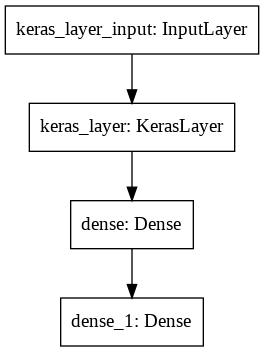

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
history = model.fit(train_text,train_labels,validation_data=(val_text, val_labels), epochs=40, batch_size=512)

Epoch 1/40
79/79 [==============================] - 6s 53ms/step - loss: 0.6401 - accuracy: 0.6313 - val_loss: 0.4331 - val_accuracy: 0.8206
Epoch 2/40
79/79 [==============================] - 4s 49ms/step - loss: 0.3563 - accuracy: 0.8667 - val_loss: 0.3065 - val_accuracy: 0.8724
Epoch 3/40
79/79 [==============================] - 4s 49ms/step - loss: 0.2209 - accuracy: 0.9199 - val_loss: 0.2759 - val_accuracy: 0.8838
Epoch 4/40
79/79 [==============================] - 4s 49ms/step - loss: 0.1548 - accuracy: 0.9485 - val_loss: 0.2747 - val_accuracy: 0.8858
Epoch 5/40
79/79 [==============================] - 4s 49ms/step - loss: 0.1070 - accuracy: 0.9689 - val_loss: 0.2894 - val_accuracy: 0.8836
Epoch 6/40
79/79 [==============================] - 4s 50ms/step - loss: 0.0743 - accuracy: 0.9820 - val_loss: 0.3136 - val_accuracy: 0.8842
Epoch 7/40
79/79 [==============================] - 4s 49ms/step - loss: 0.0508 - accuracy: 0.9903 - val_loss: 0.3378 - val_accuracy: 0.8808
Epoch 8/40
79

In [ ]:
#mount to google drive so we can save our model there
from google.colab import drive
drive.mount('/content/drive')
path = path = F"/content/drive/My Drive/semantic_analysis_model" 


Mounted at /content/drive


In [ ]:
model.save(path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/semantic_analysis_model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/semantic_analysis_model/assets


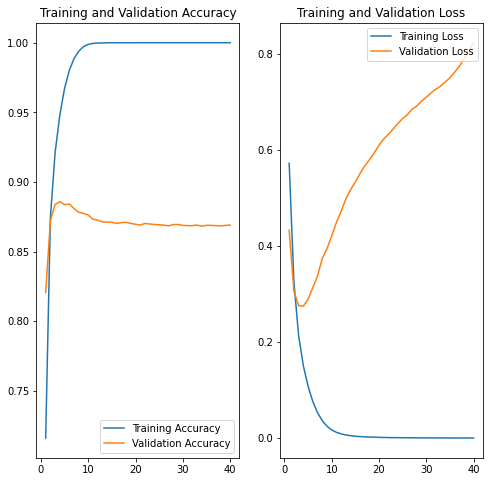

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 41)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
#these reviews were slapped right off of Rotten Tomatoes (so the model has no chance of having seen them). Try and guess which movie they came from!
negative_text = ('This recycled garbage was my displeasure of seeing, its poorly paced and badly written story line was painful to sit through and the under developed cut out characters where boring to watch, its shoehorned in themes added nothing to the movie and were too underdeveloped to make an impact.')
positive_text = ('A perfect myriad of soundtrack and cinematography in the best war film and one of the greatest films of all time. Haunting visuals and outstanding dialogue drenched in style. Some of the most iconic and impactful shots ever recorded, in a relentlessly vicious yet controlled manner. This movie comfortably rests upon the upper echelon of cinematic history.')
def predicter(x):
  predictions = model.predict(np.array([x]))
  if predictions > 0:
    print("positive")
  elif predictions< 1:
    print("negative")
  
predicter(negative_text)
predicter(positive_text)

negative
positive
